# 1. Preparing environment

## 1.1 Installing packages

## 1.2 Adding source and path to find files (Google Colab)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '' # add your path here
os.chdir(path)

## 1.3 Importing libraries

In [ ]:
# loading libraries for tabular data handling
import pandas as pd
import numpy as np
import re

# loading libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# see each section for model-specific imports

## 1.4 Defining functions

In [ ]:
# see each section for specific functions











# 2. Loading & merging data

## 2.1 loading important places data

In [ ]:
important_places_df = pd.read_csv('important_places_translated.csv')
important_places_df.head(2)

,respondent_id,language,wkt,ugs_reason,ugs_frequency,ugs_relax,ugs_natural,ugs_aesthetic,ugs_food,ugs_social,...,ugs_wilderness,ugs_dogwalking,ugs_swimming,ugs_sports,ugs_boating,ugs_walking,ugs_outdoor,ugs_other_specified,dislike,area
0,7zfc37wx7lo4,da,POINT (12.59515 55.706415),Det bringer os tæt på vandet,15.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,0,obro
1,7zfc37wx7lo4,da,POINT (12.570357 55.699256),Vi går og løber mange ture i Fælledparken og g...,30.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Frirum til børn,0,obro


In [ ]:
len(important_places_df[important_places_df.dislike==1])

1411

## 2.2 loading participant data

In [ ]:
participants_df = pd.read_csv('participants_translated.csv')

# drop columns
participants_df = participants_df.drop(['nh_frequency', 'nh_activities_living',
                                        'nh_activities_work', 'nh_activities_errands',
                                        'nh_activities_shops', 'nh_activities_sports',
                                        'nh_activities_rec', 'nh_activities_social',
                                        'nh_activities_nature', 'nh_activities_other',
                                        'nh_activities_other_specified', 'nn_hac_nature',
                                        'nn_hac_outdoor_rec', 'nn_hac_experience',
                                        'nn_hac_housing', 'nn_hac_access',
                                        'sport_member_specified', 'enviro_member_specified',
                                        'current_occupation_other_specified',
                                        'language_other_specified'], axis=1)

# preprocess language data & drop suffluent columns
participants_df['danish_speaker'] = np.where(participants_df['language'].str.contains('da|da, en'), 1, 0)
participants_df = participants_df.drop(['language', 'language_danish', 'language_english',
       'language_german', 'language_swedish', 'language_arabic',
       'language_turkish', 'language_other'], axis=1)

participants_df.head(2)

,respondent_id,gender,age,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt,danish_speaker
0,8sy4beg8kkh7,Man,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.575378 55.706844),0
1,2sm4ths4cub7,Woman,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.575323 55.706751),0


## 2.3 merge and inspect

In [ ]:
merged_df = important_places_df.merge(participants_df, on='respondent_id')
print(len(merged_df))
merged_df.head(2)

13424


,respondent_id,language,wkt_x,ugs_reason,ugs_frequency,ugs_relax,ugs_natural,ugs_aesthetic,ugs_food,ugs_social,...,age,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt_y,danish_speaker
0,7zfc37wx7lo4,da,POINT (12.59515 55.706415),Det bringer os tæt på vandet,15.0,1.0,1.0,1.0,1.0,1.0,...,31.0,No,No,No,NaN,NaN,NaN,NaN,POINT (12.589762 55.700589),1
1,7zfc37wx7lo4,da,POINT (12.570357 55.699256),Vi går og løber mange ture i Fælledparken og g...,30.0,1.0,1.0,1.0,1.0,1.0,...,31.0,No,No,No,NaN,NaN,NaN,NaN,POINT (12.589762 55.700589),1


## 2.4 Visualising merged data

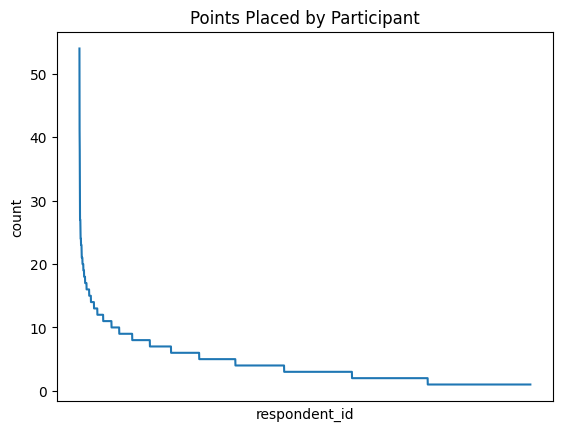

In [ ]:
sns.lineplot(merged_df['respondent_id'].value_counts())
plt.xticks([])
plt.title('Points Placed by Participant')
plt.show()

In [ ]:
# look smoother than the wishes one!

# 3. Word counts

## 3.1 Importing libraries

In [ ]:
# text preprocessing and analysis
import re

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('danish'))

# word counts
from collections import Counter

In [ ]:
# lemmatizing danish
import spacy
!python -m spacy download da_core_news_sm --quiet
nlp = spacy.load('da_core_news_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 52.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('da_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# I removed references to previous comments since they influenced my model outcomes
stopwords_set.add('område')
stopwords_set.add('sted')

## 3.2 Defining functions

In [ ]:
def tokenise_text_clean(text):
    '''Tokenises corpus, removes punctuation and stopwords, lowers all strings, lemmatizes.'''
    if type(text) == str:
        words = nltk.tokenize.word_tokenize(text)  # Convert to string to handle NaN values
        words = [word for word in words if word.isalpha()]
        words = [word.lower() for word in words]
        words = [word for word in words if word not in stopwords_set]

        # Create a spaCy document and lemmatize
        doc = nlp(' '.join(words))
        words = [token.lemma_ for token in doc]
    else:
        words = ['']
    return words

In [ ]:
# Example usage
text = "Hunde løb hurtigt, mens kattene sov."
cleaned_text = tokenise_text_clean(text)
print(cleaned_text)

['hund', 'løbe', 'hurtigt', 'mens', 'katt', 'sove']


In [ ]:
def plot_topwords(common_words, title, show=False):
  '''Plots most common words from ordered list of tuples [(word, count), ...].'''
  # Convert the data to a DataFrame for easier plotting
  top_words_df = pd.DataFrame(common_words[:30], columns=['word', 'count'])

  # Plot using sns.barplot
  plt.figure(figsize=(12, 8))
  sns.barplot(x='count', y='word', data=top_words_df, palette='crest', hue='word', legend=False)
  plt.title(title)
  plt.xlabel('Count')
  plt.ylabel('Word')

  # saving figure
  png_name = re.sub('- ', '', title.lower())
  png_name = re.sub(' ', '_', png_name)
  plt.savefig('240517_' + png_name + '.png')

  # show plot
  if show == True:
    plt.show()
  else:
    plt.close()

## 3.2 Preprocess

In [ ]:
import tqdm
tqdm.tqdm.pandas()

In [ ]:
merged_df['unigrams'] = merged_df['ugs_reason'].progress_apply(lambda x: tokenise_text_clean(x))
merged_df.head(2)

100%|██████████| 13424/13424 [01:34<00:00, 141.46it/s]


,respondent_id,language,wkt_x,ugs_reason,ugs_frequency,ugs_relax,ugs_natural,ugs_aesthetic,ugs_food,ugs_social,...,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt_y,danish_speaker,unigrams
0,7zfc37wx7lo4,da,POINT (12.59515 55.706415),Det bringer os tæt på vandet,15.0,1.0,1.0,1.0,1.0,1.0,...,No,No,No,NaN,NaN,NaN,NaN,POINT (12.589762 55.700589),1,"[bringe, tæt, vand]"
1,7zfc37wx7lo4,da,POINT (12.570357 55.699256),Vi går og løber mange ture i Fælledparken og g...,30.0,1.0,1.0,1.0,1.0,1.0,...,No,No,No,NaN,NaN,NaN,NaN,POINT (12.589762 55.700589),1,"[gå, løbe, tur, fælledpar, gå, legeplad]"


## 3.3 Overall word count and wordcloud
- removing overrepresented words like sted and omrade as a result

In [ ]:
# overall word count and word cloud

In [ ]:
tokens = []
merged_df['unigrams'].apply(lambda x: tokens.extend(x) if x != [''] else None)
word_counts = Counter(tokens)
common_words = word_counts.most_common()
num = len(merged_df)
print('Reasons:', num, common_words[:30])

Reasons: 13424 [('grøn', 912), ('gå', 835), ('tur', 543), ('natur', 502), ('kunne', 459), ('vand', 427), ('tæt', 363), ('gåtur', 347), ('stor', 336), ('dejligt', 306), ('område', 284), ('god', 266), ('så', 265), ('se', 259), ('by', 247), ('sommer', 247), ('godt', 245), ('lidt', 244), ('træ', 235), ('gåture', 232), ('bade', 231), ('udsigt', 231), ('komme', 226), ('lille', 220), ('luft', 216), ('park', 215), ('ved', 214), ('dejlig', 214), ('løbe', 212), ('bruge', 203)]


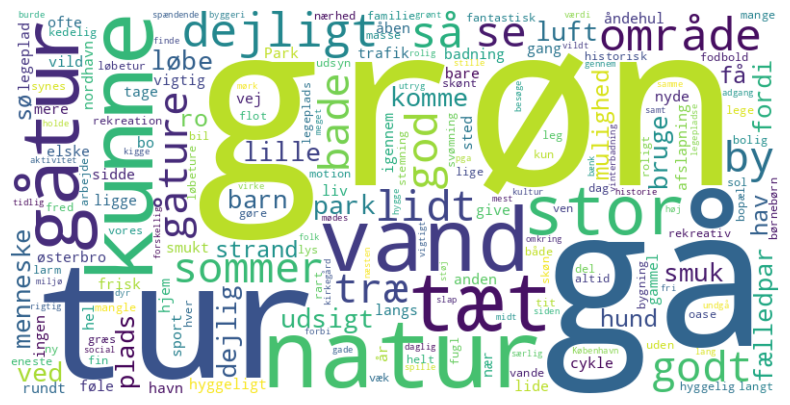

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis to be shown
plt.show()

In [ ]:
# ingen is interesting and kunne
# I would explore trafik (maybe lidt trafik) and menneske - are they more positive or negative values? let's check!

## 3.3 Word counts per like/dislike

In [ ]:
df = merged_df.copy()

Likes 12013 [('grøn', 1824), ('gå', 1670), ('tur', 1086), ('natur', 1004), ('kunne', 918), ('vand', 854), ('tæt', 726), ('gåtur', 694), ('stor', 672), ('dejligt', 612), ('område', 568), ('god', 532), ('så', 530), ('se', 518), ('by', 494), ('sommer', 494), ('godt', 490), ('lidt', 488), ('træ', 470), ('gåture', 464), ('bade', 462), ('udsigt', 462), ('komme', 452), ('lille', 440), ('luft', 432), ('park', 430), ('ved', 428), ('dejlig', 428), ('løbe', 424), ('bruge', 406)]


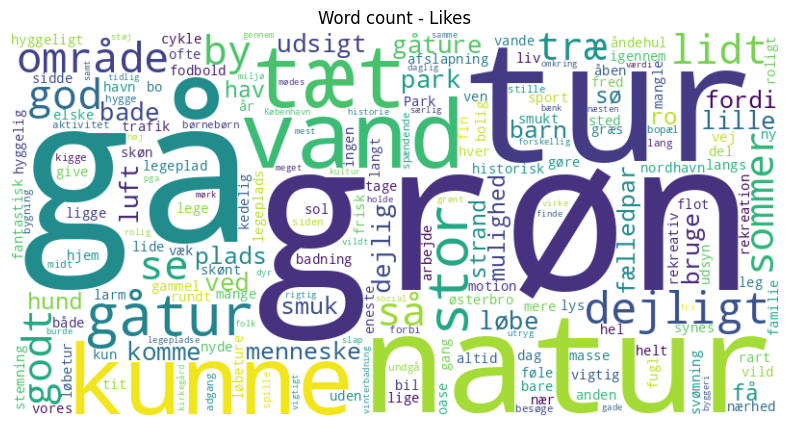

Dislikes 1411 [('grøn', 2736), ('gå', 2505), ('tur', 1629), ('natur', 1506), ('kunne', 1377), ('vand', 1281), ('tæt', 1089), ('gåtur', 1041), ('stor', 1008), ('dejligt', 918), ('område', 852), ('god', 798), ('så', 795), ('se', 777), ('by', 741), ('sommer', 741), ('godt', 735), ('lidt', 732), ('træ', 705), ('gåture', 696), ('bade', 693), ('udsigt', 693), ('komme', 678), ('lille', 660), ('luft', 648), ('park', 645), ('ved', 642), ('dejlig', 642), ('løbe', 636), ('bruge', 609)]


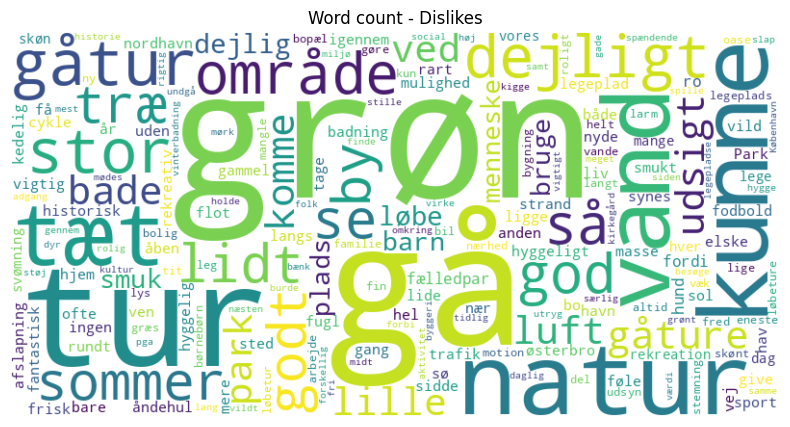

In [ ]:
for i in df.dislike.unique():
  title = 'Dislikes' if i == 1 else 'Likes'

  # count words
  merged_df['unigrams'].apply(lambda x: tokens.extend(x) if x != [''] else None)
  word_counts = Counter(tokens)
  common_words = word_counts.most_common()
  num = len(df[df.dislike == i])
  print(title, num, common_words[:30])

  # generate wordcloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

  # plot wordcloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # No axis to be shown
  plt.title(f'Word count - {title}')
  plt.show()


In [ ]:
# potentially save img and df
# dis_like_topwords.to_csv('category_topwords.csv', index=False)

## 3.4 Wordfish
- to see the most defining words of likes, dislikes
- code was re-purposed from the exercise class codes used at Advanced Social Data Science II.
- the wordfish scaler used is from the implementation by Nanni et al. (2021): https://github.com/umanlp/SemScale

### 3.4.1 Importing libraries

In [ ]:
path = "/content/drive/MyDrive/Voice of Nature/WP3/Csilla's Thesis coding/SemScale"
os.chdir(path)

In [ ]:
#Scaling packages
from helpers import io_helper
from wfcode import corpus
from wfcode import scaler
import argparse

### 3.4.2 Preprocessing

In [ ]:
merged_df['preprossed_text'] = merged_df.unigrams.apply(lambda x: ' '. join(x))
merged_df.head(2)

,respondent_id,language,wkt_x,ugs_reason,ugs_frequency,ugs_relax,ugs_natural,ugs_aesthetic,ugs_food,ugs_social,...,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt_y,danish_speaker,unigrams,preprossed_text
0,7zfc37wx7lo4,da,POINT (12.59515 55.706415),Det bringer os tæt på vandet,15.0,1.0,1.0,1.0,1.0,1.0,...,No,No,NaN,NaN,NaN,NaN,POINT (12.589762 55.700589),1,"[bringe, tæt, vand]",bringe tæt vand
1,7zfc37wx7lo4,da,POINT (12.570357 55.699256),Vi går og løber mange ture i Fælledparken og g...,30.0,1.0,1.0,1.0,1.0,1.0,...,No,No,NaN,NaN,NaN,NaN,POINT (12.589762 55.700589),1,"[gå, løbe, tur, fælledpar, gå, legeplad]",gå løbe tur fælledpar gå legeplad


In [ ]:
# grouping by categories
subset = merged_df.groupby(['dislike'], as_index = False).agg({'preprossed_text': lambda x: ' '.join(x)})
subset

,dislike,preprossed_text
0,0,bringe tæt vand gå løbe tur fælledpar gå legep...
1,1,før tid ligge skøn badebro nybyggeri gang slag...


In [ ]:
subset_doc = list(zip(subset['dislike'], subset['preprossed_text']))

In [ ]:
# parameter setting: using default parameters as used in the github code
niter = 5000      #number of iterations
lr = 0.00001      #learning rate
stopwords = None  #we've already removed stopwords

In [ ]:
# creating a corpus object
corp = corpus.Corpus(subset_doc)
corp.tokenize(stopwords = stopwords)

Loading corpus, received: 2 docs.
2024-10-10 11:27:49 Preprocessing corpus...


In [ ]:
# building the document-feature matrix
corp.build_occurrences()

2024-10-10 11:27:49 Building vocabulary...
2024-10-10 11:27:49 Building coocurrence matrix...
1/2
2/2


In [ ]:
# checking the shape of the document-feature matrix
corp.occurrences.shape

(2, 4953)

In [ ]:
# checking the vocabulary
corp.vocabulary

{'bringe': 0,
 'tæt': 1,
 'vand': 2,
 'løbe': 3,
 'tur': 4,
 'fælledpar': 5,
 'legeplad': 6,
 'lege': 7,
 'dernede': 8,
 'niece': 9,
 'nevø': 10,
 'fordi': 11,
 'skønt': 12,
 'naturområde': 13,
 'samt': 14,
 'løbetur': 15,
 'besøge': 16,
 'skolebørn': 17,
 'undervisning': 18,
 'gsaktiviteter': 19,
 'område': 20,
 'adgang': 21,
 'havvand': 22,
 'mulighed': 23,
 'bade': 24,
 'cykle': 25,
 'igennem': 26,
 'vej': 27,
 'håbe': 28,
 'dag': 29,
 'græs': 30,
 'gammel': 31,
 'cirkusplads': 32,
 'kunne': 33,
 'bruge': 34,
 'motion': 35,
 'afslapning': 36,
 'social': 37,
 'aktivitet': 38,
 'smukt': 39,
 'vinterbadning': 40,
 'blæse': 41,
 'natur': 42,
 'grøn': 43,
 'virke': 44,
 'berolige': 45,
 'god': 46,
 'mere': 47,
 'biodiversitet': 48,
 'værdi': 49,
 'ret': 50,
 'ofte': 51,
 'familie': 52,
 'sommer': 53,
 'spille': 54,
 'fodbold': 55,
 'øif': 56,
 'derudover': 57,
 'fredfyldt': 58,
 'mindfulness': 59,
 'afstressning': 60,
 'fred': 61,
 'træ': 62,
 'blomste': 63,
 'græsse': 64,
 'søn': 65,
 '

### 3.4.3 Training the wordfish scaler

In [ ]:
from datetime import datetime

In [ ]:
wf_scaler = scaler.WordfishScaler(corp)

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " WordFish scaling begun.")

wf_scaler.initialize()
wf_scaler.train(learning_rate = lr, num_iters = niter)

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " WordFish scaling completed.")

2024-10-10 11:27:50 WordFish scaling begun.
Initializing...
Alpha docs: 
[ 0.         -0.92040956]
Training...
Initial objective score: -74754.4296875
Iteration (secondary) 1: -74761.53125
Iteration (secondary) 101: -75360.7734375
Iteration (secondary) 201: -75795.1171875
Iteration (secondary) 301: -76127.515625
Iteration (secondary) 401: -76394.5703125
Iteration (secondary) 501: -76617.2265625
Iteration (secondary) 601: -76808.0625
Iteration (secondary) 701: -76975.0546875
Iteration (secondary) 801: -77123.625
Iteration (secondary) 901: -77257.4765625
Iteration (secondary) 1001: -77379.421875
Iteration (secondary) 1101: -77491.421875
Iteration (secondary) 1201: -77595.03125
Iteration (secondary) 1301: -77691.4609375
Iteration (secondary) 1401: -77781.6640625
Iteration (secondary) 1501: -77866.3984375
Iteration (secondary) 1601: -77946.3046875
Iteration (secondary) 1701: -78021.875
Iteration (secondary) 1801: -78093.578125
Iteration (secondary) 1901: -78161.7890625
Iteration (secondary

### 3.4.4 Investigating results

In [ ]:
# omega values (estimated position of documents)
corp.results
# likes is -1, dislikes is 1

{0: -1.0, 1: 1.0}

In [ ]:
# beta values (word weights)
beta = wf_scaler.beta_words

# obtaining the lowest and highest beta values
max_ind = beta.argsort()[-20:]
min_ind = beta.argsort()[:20]

In [ ]:
# psi values (word frequencies)
psi = wf_scaler.psi_words

dfm = np.subtract(corp.occurrences, 1)

In [ ]:
# preparing vocabulary to be able to access it by index
vocab_words = list(corp.vocabulary.keys())

In [ ]:
corp.vocabulary['menneske']

282

In [ ]:
vocab_words[1847]

'mennerske'

In [ ]:
# words with the max 10 beta values
for i in max_ind:
  no_of_occurences = np.sum(dfm[:, i])
  print(vocab_words[i], ' -- ', beta[i], ' -- ', no_of_occurences)

virke  --  0.54517657  --  41.0
overfylde  --  0.56179243  --  23.0
byggeri  --  0.5917808  --  34.0
støj  --  0.5932524  --  36.0
synes  --  0.6002577  --  76.0
trafå  --  0.6032828  --  21.0
kun  --  0.6453787  --  57.0
kedeligt  --  0.6869897  --  25.0
grimt  --  0.7028662  --  32.0
trafikere  --  0.70682925  --  26.0
trist  --  0.72104424  --  33.0
grim  --  0.7452332  --  28.0
mangle  --  0.81522524  --  59.0
mørk  --  0.8218502  --  39.0
ingen  --  0.82367915  --  116.0
larm  --  0.86020434  --  58.0
trafik  --  0.93752617  --  102.0
undgå  --  0.98038846  --  48.0
utryg  --  0.9958694  --  44.0
kedelig  --  1.0523301  --  72.0


In [ ]:
# words with the min 10 beta values
for i in min_ind:
  no_of_occurences = np.sum(dfm[:, i])
  print(vocab_words[i], ' -- ', beta[i], ' -- ', no_of_occurences)
  # print(vocab_words[i], ' -- ', beta[i])

tur  --  -1.01972  --  543.0
gåtur  --  -1.0103955  --  347.0
dejligt  --  -0.9765509  --  306.0
vand  --  -0.9218799  --  427.0
gåture  --  -0.88890857  --  232.0
luft  --  -0.8820085  --  216.0
bade  --  -0.8330036  --  231.0
hav  --  -0.802155  --  149.0
dejlig  --  -0.7860482  --  214.0
smuk  --  -0.7658725  --  193.0
udsigt  --  -0.763303  --  231.0
løbe  --  -0.7467502  --  212.0
åndehul  --  -0.7331908  --  138.0
tæt  --  -0.7259247  --  363.0
badning  --  -0.72041315  --  142.0
afslapning  --  -0.6941675  --  112.0
god  --  -0.67882717  --  266.0
smukt  --  -0.6675496  --  120.0
frisk  --  -0.6664358  --  92.0
elske  --  -0.66298246  --  127.0


In [ ]:
# get beta of specific words
for word in ['menneske', 'trafik', 'ingen', 'kunne']:
  i = corp.vocabulary[word]
  print(vocab_words[i], ' -- ', beta[i])

menneske  --  0.53727573
trafik  --  0.93752617
ingen  --  0.82367915
kunne  --  -0.17219746


In [ ]:
# bigram wordfish fx ingen trafik could be interesting
# if not possible, we can check no of occurence of just this, just that and both

In [ ]:
# psi values (frequency of individual words)
psi = wf_scaler.psi_words

dfm = np.subtract(corp.occurrences, 1)

print('Frequency of word with highest psi value:',np.sum(dfm[:, psi.argmax()]))
print('Most frequent word: ',vocab_words[psi.argmax()])
print('Frequency of word with lowest psi value: ', np.sum(dfm[:, psi.argmin()]))
print('Least frequent word: ',vocab_words[psi.argmin()])

Frequency of word with highest psi value: 912.0
Most frequent word:  grøn
Frequency of word with lowest psi value:  1.0
Least frequent word:  niece


In [ ]:
np.sum(dfm[:, corp.vocabulary['grøn']])

912.0

In [ ]:
# checking the no of cooccurrence of ingen trafik in the overall df
print('ingen:', len(df[df.unigrams.apply(lambda x: 'ingen' in x)]))
print('trafik:', len(df[df.unigrams.apply(lambda x: 'trafik' in x)]))
print('ingen & trafik', len(df[df.unigrams.apply(lambda x: 'ingen' in x) & df.unigrams.apply(lambda x: 'trafik' in x)]))

ingen: 111
trafik: 100
ingen & trafik 11


In [ ]:
# checking values for each
df[df.unigrams.apply(lambda x: 'ingen' in x)].dislike.value_counts()

,count
dislike,
1,77
0,34


In [ ]:
df[df.unigrams.apply(lambda x: 'trafik' in x)].dislike.value_counts()

,count
dislike,
1,77
0,23


In [ ]:
df[df.unigrams.apply(lambda x: 'ingen' in x) & df.unigrams.apply(lambda x: 'trafik' in x)].dislike.value_counts()

,count
dislike,
0,8
1,3


In [ ]:
df[df.unigrams.apply(lambda x: 'ingen' in x) & df.unigrams.apply(lambda x: 'trafik' in x) & df.dislike==1]

,respondent_id,language,wkt_x,ugs_reason,ugs_frequency,ugs_relax,ugs_natural,ugs_aesthetic,ugs_food,ugs_social,...,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt_y,danish_speaker,unigrams
9790,6i6omd2iaj4a,da,POINT (12.560196 55.713178),Megen trafik. Ingen natur. Ikke rekreativt.,3.0,NaN,NaN,NaN,NaN,NaN,...,No,Yes,No,NaN,NaN,NaN,NaN,POINT (12.572047 55.707316),1,"[meget, trafik, ingen, natur, rekreativ]"
10122,82ie3aj7zi87,en,POINT (12.590713 55.702669),det er for urbant og har ikke noget at byde på...,0.0,NaN,NaN,NaN,NaN,NaN,...,No,Yes,No,Yes,Yes,Self-Employed,500.000 - 750.000kr,POINT (12.579166 55.699859),0,"[urbant, byde, tage, norhavn, svømme, løbe, ru..."
10672,6d3zp47mwa37,da,POINT (12.599045 55.712318),Der er for meget trafik på de veje som man ska...,11.0,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,No,NaN,NaN,NaN,NaN,POINT (12.592071 55.706557),1,"[trafik, vej, brug, komme, derud, tung, trafik..."


## 3.3 Keywords to geojson

In [ ]:
# mennerske because it is neutral
# natur to map greenery
#

In [ ]:
keywords = ['menneske', 'natur', 'vand', 'hav']

In [ ]:
for keyword in keywords:
  print(keyword, ':', len(merged_df[merged_df.unigrams.apply(lambda x: keyword in x)]))
  merged_df[keyword] = merged_df.unigrams.apply(lambda x: 1 if keyword in x else 0)

menneske : 191
natur : 491
vand : 418
hav : 147


In [ ]:
# add up same
# merged_df['swim_ming'] = merged_df['swim'] + merged_df['swimming']
# merged_df['fish_ing'] = merged_df['fish'] + merged_df['fishing']

In [ ]:
import geopandas as gpd
merged_df['geometry'] = gpd.GeoSeries.from_wkt(merged_df['wkt_x'])
merged_df = merged_df.drop(['wkt_x'], axis=1)
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')
gdf = gdf.set_crs(epsg='4326')
gdf = gdf.drop(['unigrams'], axis=1)

In [ ]:
gdf.to_file('/content/drive/MyDrive/Voice of Nature/Data/important_places_merged_df.geojson', driver='GeoJSON')

# Next up:
**Output data:** important_places_merged_df.geojson
- QGIS